# Name :- Saloni Mhatre

# Prediction using Decision tree Algorithm

This deals with understanding the working of decision trees.

In [2]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [4]:
# Loading the iris dataset 
iris=datasets.load_iris()
print (dir(iris))         #printing the directory



['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [29]:
# Forming the iris dataframe
x=pd.DataFrame(iris.data, columns=iris.feature_names)
print(x.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [30]:
x["Species"] = iris.target

In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [32]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [33]:
#ckecking for missing data
x.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

### As we can see there is no null value present in the  datset

# Data visualization

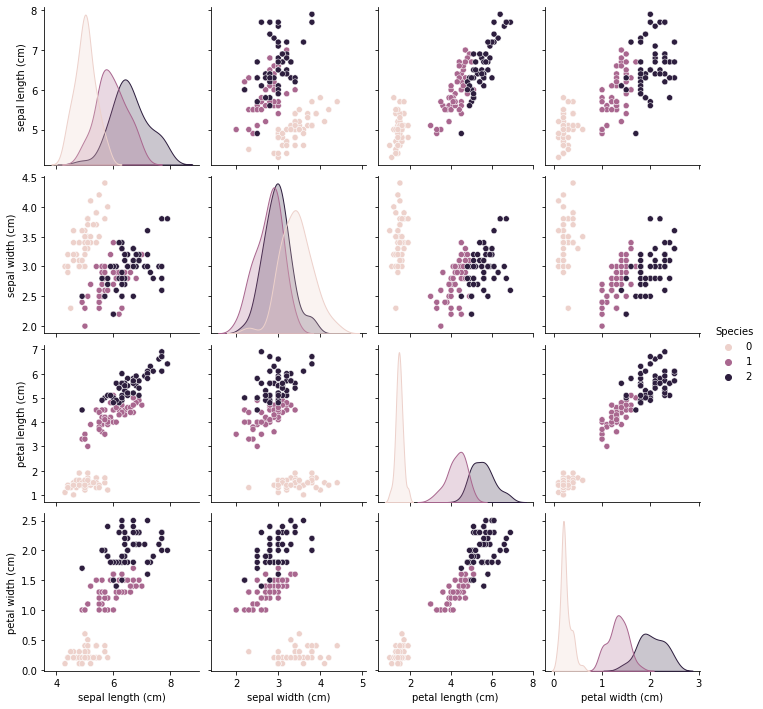

In [34]:
import seaborn as sns
sns.pairplot(x , hue = "Species")

Petal lenght and petal width shows high relationship

# Using the Heatmap to visualize the relationship between the variables.

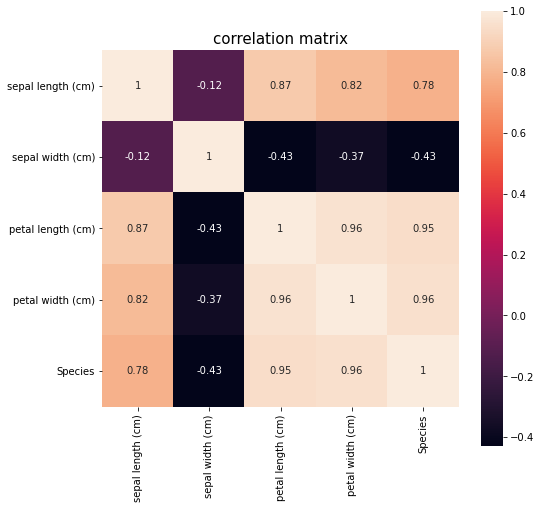

In [35]:
cor = x.corr()
fig = plt.figure(figsize = (8, 8))
mp = sns.heatmap(cor, vmax = 1, square = True, annot = True , color = "Blue")
mp.set_title("correlation matrix", fontsize = 15)
plt.show()

In [41]:
#Spliting the data into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [42]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
dtree=DecisionTreeClassifier(random_state = 0)
dtree.fit(x_train, y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Visualizing the decesion tree 

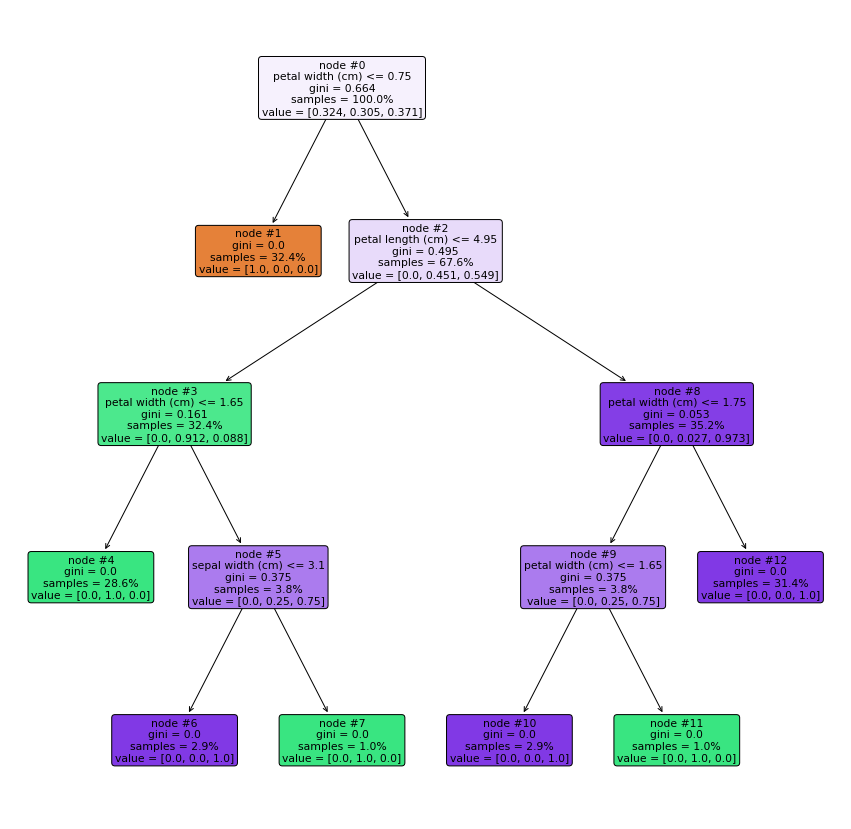

In [43]:
plt.figure(figsize = (15,15))
tree.plot_tree(dtree, filled = True, rounded = True, proportion = True, node_ids = True, feature_names = iris.feature_names)
plt.show()

### Training the Decision Tree classification model on a Training set

In [44]:
predict = dtree.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("Accuracy of the model is", accuracy_score(predict, y_test))

print("Classification of the model is", classification_report(predict, y_test))

Accuracy of the model is 0.9777777777777777
Classification of the model is               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

